In [1]:
%config Completer.use_jedi = False
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
from pandas.api.types import CategoricalDtype
import math
import matplotlib as mpl
#mpl.use('pdf')
import matplotlib.pyplot as plt
import matplotlib.font_manager
import numpy as np
from collections import OrderedDict
import matplotlib
import seaborn as sns
from pylab import cm
from matplotlib.cbook import boxplot_stats
from matplotlib.legend_handler import HandlerTuple

from scipy.stats.mstats import hmean

from pprint import pprint
from IPython.display import display, HTML

import subprocess

#Red
red1= sns.color_palette("Reds_d",1)
red2= sns.color_palette("Reds_d",2)
red3= sns.color_palette("Reds_d",3)
red4= sns.color_palette("Reds_d",4)
red5= sns.color_palette("Reds_d",5)
red6= sns.color_palette("Reds_d",6)
red7= sns.color_palette("Reds_d",7)
red8= sns.color_palette("Reds_d",8)

#YellowGreen
yg1= sns.color_palette("YlGn_d",1)
yg2= sns.color_palette("YlGn_d",2)
yg3= sns.color_palette("YlGn_d",3)
yg4= sns.color_palette("YlGn_d",4)
yg5= sns.color_palette("YlGn_d",5)
yg7= sns.color_palette("YlGn_d",7)

#GreenBlue
gb1= sns.color_palette("GnBu_d",1)
gb2= sns.color_palette("GnBu_d",2)
gb3= sns.color_palette("GnBu_d",3)
gb4= sns.color_palette("GnBu_d",4)
gb5= sns.color_palette("GnBu_d",5)
gb6= sns.color_palette("GnBu_d",6)
gb7= sns.color_palette("GnBu_d",7)
gb8= sns.color_palette("GnBu_d",8)

cp2 = list(map(lambda x: sns.desaturate(x,0.9),[red7[2],gb7[4]]))
cp2v1 = list(map(lambda x: sns.desaturate(x,0.9),[red7[2],yg7[0]]))
cp3 = list(map(lambda x: sns.desaturate(x,0.9),[yg7[0],gb7[4],red7[2]]))
cp4 = list(map(lambda x: sns.desaturate(x,0.9),red1+gb2+yg1))
cp2_2 = list(map(lambda x: sns.desaturate(x,0.9),[red7[0],red7[3],gb7[4],gb7[6]]))
cp_total_spectrum = list(map(lambda x: sns.desaturate(x,0.9),gb7 + yg7 + red7))


cpbasic = list(map(lambda x: sns.desaturate(x,0.9),['g','r','b','orange','grey']))
sns.set_palette(cpbasic)
sns.color_palette()

sns.set_palette("Dark2", 7)
sns.color_palette()

colors = cm.get_cmap('PuRd',  5)
colors_dark = cm.get_cmap('Dark2',  5)
viridis = cm.get_cmap('viridis',  4)
magma = cm.get_cmap('magma',  8)
cp6 = list(map(lambda x: sns.desaturate(x,0.9),[colors(2), gb7[4], red7[2], magma(6),  viridis(3), yg7[0]]))

cp3_special = list(map(lambda x: sns.desaturate(x,0.9),[magma(6), red1[0], yg1[0]]))
cp2_special = list(map(lambda x: sns.desaturate(x,0.9),[red1[0], yg1[0]])) # magma(6)

/tmp/ipykernel_56247/1292766982.py:68: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('PuRd',  5)
/tmp/ipykernel_56247/1292766982.py:69: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors_dark = cm.get_cmap('Dark2',  5)
/tmp/ipykernel_56247/1292766982.py:70: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis',  4)
/tmp/ipykernel_56247/1292766982.py:71: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotl

---

In [2]:
include_small = 0

---

In [3]:
def read_data_comparison(device, sparse_format):
    header = ['matrix','threads','csr_m','csr_n','csr_nnz',
              'time','gflops','csr_mem_footprint','W_avg','J_estimated',
              'format_name','m','n','nnz','mem_footprint',
              'compression_ratio','CSRCV_NUM_PACKET_VALS']
    
    df = pd.read_csv('./' + device + '/' + sparse_format + '.csv', header=None, names=header)
    
    # Modify 'format_name' based on 'sparse_format'
    if 'mkl_ie_f' in sparse_format:
        df['format_name'] = df['format_name'].apply(lambda x: x + '(float)')
    if sparse_format == 'csrrv_d':
        df['format_name'] = df['format_name'].apply(lambda x: 'CSR&RV') 
    
    # need to keep matrix name only (discard full filename + .mtx extension)
    df['matrix'] = df['matrix'].apply(lambda x: x.split('/')[-1].replace('.mtx', ''))
    
    # this column is useless in "normal" formats
    df.drop('CSRCV_NUM_PACKET_VALS', axis=1)
    return df

def read_device_comparison_data(device, sparse_formats):
    # Define a list to hold all DataFrames
    all_dfs = []

    # Iterate through sparse formats and read data
    for sparse_format in sparse_formats:
        df = read_data_comparison(device, sparse_format)
        all_dfs.append(df)

    # Concatenate all DataFrames
    merged_df = pd.concat(all_dfs, ignore_index=True)

    # Print the merged DataFrame
    return merged_df


In [4]:
sparse_formats = ['aocl_optmv_d', 'csr5_d', 'csr_d', 
                  'csr_vector_lut_x86_d', 'csr_vector_x86_d', 
                  'mkl_ie_d', 'mkl_ie_f', 'sparsex_d']
lumi_comparison_formats_df = read_device_comparison_data('lumi', sparse_formats)
# print('lumi comparison formats\n', sorted(set(lumi_comparison_formats_df['format_name'])))
# lumi_comparison_formats_df

if(include_small):
    sparse_formats = ['/matrices_small/aocl_optmv_d', '/matrices_small/csr5_d', '/matrices_small/csr_d', 
                      '/matrices_small/csr_vector_lut_x86_d', '/matrices_small/csr_vector_x86_d', 
                      '/matrices_small/mkl_ie_d', '/matrices_small/mkl_ie_f', '/matrices_small/sparsex_d']
    lumi_comparison_formats_small_df = read_device_comparison_data('lumi', sparse_formats)
    # lumi_comparison_formats_small_df


In [5]:
sparse_formats = ['aocl_optmv_d', 'csr5_d', 'csr_d', 'csrrv_d', 
                  'csr_vector_lut_x86_d', 'csr_vector_x86_d', 
                  'mkl_ie_d', 'mkl_ie_f', 'sparsex_d']
icy_comparison_formats_df = read_device_comparison_data('icy', sparse_formats)
# print('icy comparison formats\n', sorted(set(icy_comparison_formats_df['format_name'])))
icy_comparison_formats_df

if(include_small):
    sparse_formats = ['/matrices_small/aocl_optmv_d', '/matrices_small/csr5_d', '/matrices_small/csr_d', '/matrices_small/csrrv_d', 
                      '/matrices_small/csr_vector_lut_x86_d', '/matrices_small/csr_vector_x86_d', 
                      '/matrices_small/mkl_ie_d', '/matrices_small/mkl_ie_f', '/matrices_small/sparsex_d']
    icy_comparison_formats_small_df = read_device_comparison_data('icy', sparse_formats)
    # icy_comparison_formats_small_df


---

In [6]:
def read_data_compression(device, sparse_format, tolerance=''):
    header = ['matrix','threads','csr_m','csr_n','csr_nnz',
              'time','gflops','csr_mem_footprint','W_avg','J_estimated',
              'format_name','m','n','nnz','mem_footprint',
              'compression_ratio','CSRCV_NUM_PACKET_VALS',
              'unbalance_time', 'unbalance_size', 'row_bits_avg', 'col_bits_avg', 'row_col_bytes_avg'
             ]
    
    df = pd.read_csv('./' + device + '/' + sparse_format + '.csv', header=None, names=header)
    
    # need to keep matrix name only (discard full filename + .mtx extension)
    df['matrix'] = df['matrix'].apply(lambda x: x.split('/')[-1].replace('.mtx', ''))
    
    if(tolerance!=''):
        df['format_name'] = df['format_name'] + ' (' + df['CSRCV_NUM_PACKET_VALS'].astype(str) + ')' + ' (tolerance ' + tolerance + ')'
    else:
        df['format_name'] = df['format_name'] + ' (' + df['CSRCV_NUM_PACKET_VALS'].astype(str) + ')'
    
    return df

def read_device_compression_data(device, sparse_formats):
    # Define a list to hold all DataFrames
    all_dfs = []

    # Iterate through sparse formats and read data
    for sparse_format in sparse_formats:
        # If an exponential is in the format name, it means that a matrix error tolerance is being checked. 
        # Need to pass the tolerance, in order for the format_name to be formatted accordingly
        tolerance = sparse_format.split('1e-')
        if(len(tolerance)>1):
            df = read_data_compression(device, sparse_format, tolerance[1])
        else:
            df = read_data_compression(device, sparse_format)
        all_dfs.append(df)

    # Concatenate all DataFrames
    merged_df = pd.concat(all_dfs, ignore_index=True)

    # Print the merged DataFrame
    return merged_df


In [7]:
sparse_formats = ['csr_cv_stream_int_sort_abs_znp_shift', 'csr_cv_fpc',
                  'sort_diff_lossy/csr_cv_stream_1e-3', 'sort_diff_lossy/csr_cv_stream_1e-6',
                  'sort_diff_lossy/csr_cv_stream_1e-9', 'sort_diff_lossy/csr_cv_stream_1e-12']
lumi_compression_df = read_device_compression_data('lumi', sparse_formats)
# print('lumi compression formats\n', sorted(set(lumi_compression_df['format_name'])))
lumi_compression_df

if(include_small):
    sparse_formats = ['/matrices_small/csr_cv_stream_int_sort_abs_znp_shift', '/matrices_small/csr_cv_fpc']
    lumi_compression_small_df = read_device_compression_data('lumi', sparse_formats)
    # lumi_compression_small_df    

In [8]:
sparse_formats = ['csr_cv_stream_int_sort_abs_znp_shift', 'csr_cv_fpc']
icy_compression_df = read_device_compression_data('icy', sparse_formats)
# print('icy compression formats\n', sorted(set(icy_compression_df['format_name'])))
icy_compression_df

if(include_small):
    sparse_formats = ['/matrices_small/csr_cv_stream_int_sort_abs_znp_shift', '/matrices_small/csr_cv_fpc']
    icy_compression_small_df = read_device_compression_data('icy', sparse_formats)
    # icy_compression_small_df

---

In [9]:
if(include_small):
    lumi_df = pd.concat([lumi_comparison_formats_df, lumi_compression_df,
                         lumi_comparison_formats_small_df, lumi_compression_small_df,
                        ], ignore_index=True)
else:
    lumi_df = pd.concat([lumi_comparison_formats_df, lumi_compression_df
                        ], ignore_index=True)
lumi_df

,matrix,threads,csr_m,csr_n,csr_nnz,time,gflops,csr_mem_footprint,W_avg,J_estimated,...,n,nnz,mem_footprint,compression_ratio,CSRCV_NUM_PACKET_VALS,unbalance_time,unbalance_size,row_bits_avg,col_bits_avg,row_col_bytes_avg
0,spal_004,64,10203,321696,46168124,1.430097,8.264501,528.391174,0.0,0.0,...,321696,46168124,528.391174,1.000000,16384,NaN,NaN,NaN,NaN,NaN
1,ldoor,64,952203,952203,46522475,1.492540,7.979520,536.039845,0.0,0.0,...,952203,46522475,536.039845,1.000000,16384,NaN,NaN,NaN,NaN,NaN
2,dielFilterV2real,64,1157456,1157456,48538952,1.413920,9.406243,559.899570,0.0,0.0,...,1157456,48538952,559.899570,1.000000,16384,NaN,NaN,NaN,NaN,NaN
3,nv2,64,1453908,1453908,52728362,1.636479,8.248479,608.974438,0.0,0.0,...,1453908,52728362,608.974438,1.000000,16384,NaN,NaN,NaN,NaN,NaN
4,af_shell10,64,1508065,1508065,52672325,1.272723,12.415665,608.539738,0.0,0.0,...,1508065,52672325,608.539738,1.000000,16384,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3533,nlpkkt200,64,16240000,16240000,448225632,2.226509,51.536168,5191.485966,0.0,0.0,...,16240000,448225632,2148.325716,0.413817,1048576,4.08,0.43,8.0,24.0,4.0
3534,nlpkkt200,64,16240000,16240000,448225632,2.188006,52.443083,5191.485966,0.0,0.0,...,16240000,448225632,2148.325716,0.413817,2097152,4.14,0.43,8.0,24.0,4.0
3535,nlpkkt200,64,16240000,16240000,448225632,2.184932,52.516856,5191.485966,0.0,0.0,...,16240000,448225632,2148.325716,0.413817,4194304,4.06,0.43,8.0,24.0,4.0
3536,nlpkkt200,64,16240000,16240000,448225632,2.186329,52.483301,5191.485966,0.0,0.0,...,16240000,448225632,2148.325716,0.413817,8388608,4.01,0.43,8.0,24.0,4.0


In [10]:
if(include_small):
    icy_df = pd.concat([icy_comparison_formats_df, icy_compression_df,
                        icy_comparison_formats_small_df, icy_compression_small_df,
                       ], ignore_index=True)
else:
    icy_df = pd.concat([icy_comparison_formats_df, icy_compression_df,
                       ], ignore_index=True)
icy_df

,matrix,threads,csr_m,csr_n,csr_nnz,time,gflops,csr_mem_footprint,W_avg,J_estimated,...,n,nnz,mem_footprint,compression_ratio,CSRCV_NUM_PACKET_VALS,unbalance_time,unbalance_size,row_bits_avg,col_bits_avg,row_col_bytes_avg
0,spal_004,16,10203,321696,46168124,1.074263,11.002002,528.391174,0.0,0.0,...,321696,46168124,528.391174,1.000000,16384,NaN,NaN,NaN,NaN,NaN
1,ldoor,16,952203,952203,46522475,1.071976,11.110097,536.039845,0.0,0.0,...,952203,46522475,536.039845,1.000000,16384,NaN,NaN,NaN,NaN,NaN
2,dielFilterV2real,16,1157456,1157456,48538952,1.240767,10.014753,559.899570,0.0,0.0,...,1157456,48538952,559.899570,1.000000,16384,NaN,NaN,NaN,NaN,NaN
3,nv2,16,1453908,1453908,52728362,1.729351,7.805505,608.974438,0.0,0.0,...,1453908,52728362,608.974438,1.000000,16384,NaN,NaN,NaN,NaN,NaN
4,af_shell10,16,1508065,1508065,52672325,1.242749,10.850236,608.539738,0.0,0.0,...,1508065,52672325,608.539738,1.000000,16384,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,nlpkkt200,16,16240000,16240000,448225632,36.020739,3.185547,5191.485966,0.0,0.0,...,16240000,448225632,3050.180093,0.587535,524288,NaN,NaN,NaN,NaN,NaN
1355,nlpkkt200,16,16240000,16240000,448225632,37.130162,3.090365,5191.485966,0.0,0.0,...,16240000,448225632,3050.147407,0.587529,1048576,NaN,NaN,NaN,NaN,NaN
1356,nlpkkt200,16,16240000,16240000,448225632,37.669601,3.046110,5191.485966,0.0,0.0,...,16240000,448225632,3050.125071,0.587524,2097152,NaN,NaN,NaN,NaN,NaN
1357,nlpkkt200,16,16240000,16240000,448225632,37.867014,3.030230,5191.485966,0.0,0.0,...,16240000,448225632,3050.113060,0.587522,4194304,NaN,NaN,NaN,NaN,NaN


---

In [11]:
# original for IEEE paper
width = 3.487
height = width/1.618

# plt.rc('font', family='serif', serif='Times', size=font)
#plt.rc('text', usetex=True)  
font=5
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams.update({'font.size': 5})
# plt.rc('xtick', labelsize=font)
# plt.rc('ytick', labelsize=font)
# plt.rc('legend', fontsize=font)
# plt.rc('axes', labelsize=font)


In [12]:
# I want to replace the original format names. Do it in tuples (old,new)

def apply_replacements(df, replacements):
    for replacement in replacements:
        old_value, new_value = replacement
        df['format_name'] = df['format_name'].str.replace(old_value, new_value)

# LUMI
replacements =  [('AOCL_OPTMV',            'AMD-AOCL'),
                 ('CSR5',                  'CSR5'),
                 ('Custom_CSR_BV_LUT_x86', 'Dictionary'),
                 ('Custom_CSR_BV_x86',     'Balanced-Vectorized-CSR'),
                 ('Custom_CSR_B',          'Balanced-CSR'),
                 ('MKL_IE(float)',         'MKL(32-bits)'),
                 ('MKL_IE',                'MKL(64-bits)'),
                 ('SparseX',               'SparseX'),
                 ('CSR_CVS',               'HMC'),
                 ('CSR_CV',                'FPC')
                ]
apply_replacements(lumi_df, replacements)

# ICY
replacements =  [('AOCL_OPTMV',            'AMD-AOCL'),
                 ('CSR5',                  'CSR5'),
                 ('Custom_CSR_BV_LUT_x86', 'Dictionary(2)'),
                 ('Custom_CSR_BV_x86',     'Balanced-Vectorized-CSR'),
                 ('Custom_CSR_B',          'Balanced-CSR'),
                 ('CSR&RV',                'Dictionary'),
                 ('MKL_IE(float)',         'MKL(32-bits)'),
                 ('MKL_IE',                'MKL(64-bits)'),
                 ('SparseX',               'SparseX'),
                 ('CSR_CVS',               'HMC'),
                 ('CSR_CV',                'FPC')
                ]
apply_replacements(icy_df, replacements)


---

In [13]:
def plot_barplot_per_matrix(device_df, device, formats_to_plot):
    # Sort matrices by memory footprint (in CSR representation) and then plot each matrix separate
    device_df.sort_values(by='csr_mem_footprint', ascending=True, inplace=True)
    matrix_values = device_df['matrix'].unique()

    # Iterate through each 'matrix' and plot the barplot
    for matrix_value in matrix_values:
        
        # Filter the DataFrame for the specific 'matrix' and the specified formats
        filtered_df = device_df[(device_df['matrix'] == matrix_value) & (device_df['format_name'].isin(formats_to_plot))]

        if filtered_df.empty:
            print(f"No data found for matrix '{matrix_value}' and the specified formats.")
            return

        # Create a custom color palette based on the provided format_color_mapping
        # custom_palette = [format_color_mapping[format_name] for format_name in formats_to_plot]

        # Create the barplot
        sns.barplot(x='format_name', y='gflops', data=filtered_df, order=formats_to_plot)

        plt.title('Performance of Matrix "%s" on device "%s"' % (matrix_value, device))
        plt.xlabel('Format Name')
        plt.ylabel('Performance (GFLOPs)')

        # Rotate x-axis labels for better visibility if needed
        plt.xticks(rotation=90)

        # Save the plot as a PDF
        plt.tight_layout()
        plt.savefig('./plots/barplots_per_matrix/'+ device  +'/barplot_matrix_%s.pdf' % (matrix_value))
        plt.close()
        subprocess.run(['pdfcrop', './plots/barplots_per_matrix/'+ device  +'/barplot_matrix_%s.pdf' % (matrix_value)])
        subprocess.run(['mv', './plots/barplots_per_matrix/'+ device  +'/barplot_matrix_%s-crop.pdf' % (matrix_value),
                              './plots/barplots_per_matrix/'+ device  +'/barplot_matrix_%s.pdf' % (matrix_value)])


In [14]:
plt.rc('figure', figsize=(width,height))

normal_formats = ['CSR5', 'SparseX', 'Dictionary', 'MKL(64-bits)', 'MKL(32-bits)', ]

compression_formats = [
                       'FPC (64)',      'FPC (128)',     'FPC (256)',     'FPC (512)', 
                       'FPC (1024)',    'FPC (2048)',    'FPC (4096)',    'FPC (8192)',
                       'FPC (16384)',
                       'FPC (32768)',   'FPC (65536)',   'FPC (131072)',
                       'FPC (262144)',  'FPC (524288)',  'FPC (1048576)', 'FPC (2097152)',
                       'FPC (4194304)', 'FPC (8388608)', 'FPC (16777216)',

                       'HMC (64)',      'HMC (128)',     'HMC (256)',     'HMC (512)', 
                       'HMC (1024)',    'HMC (2048)',    'HMC (4096)',    'HMC (8192)',
                       'HMC (16384)',
                       'HMC (32768)',   'HMC (65536)',   'HMC (131072)',
                       'HMC (262144)',  'HMC (524288)',  'HMC (1048576)', 'HMC (2097152)',
                       'HMC (4194304)', 'HMC (8388608)', 'HMC (16777216)'

                        ]
formats_to_plot = normal_formats + compression_formats


if(0):
    plot_barplot_per_matrix(lumi_df, 'lumi', formats_to_plot)
    plot_barplot_per_matrix(icy_df,  'icy', formats_to_plot)


In [15]:
def plot_barplot_device(device_df, device, formats_to_plot, special=''):
    # Sort matrices by memory footprint (in CSR representation) and then plot each matrix separate
    device_df.sort_values(by='csr_mem_footprint', ascending=True, inplace=True)
    matrix_values = device_df['matrix'].unique()
    
    # Filter the DataFrame for the specified matrices and the specified formats
    filtered_df = device_df[(device_df['matrix'].isin(matrix_values)) & (device_df['format_name'].isin(formats_to_plot))]

    if filtered_df.empty:
        print("No data found for the specified matrices and formats.")
        return

    # Create a mapping of matrix names to IDs
    matrix_id_mapping = {matrix: f'({i+1})' for i, matrix in enumerate(matrix_values)}
    if('Average' in matrix_id_mapping.keys()):
        matrix_id_mapping['Average'] = 'avg'

    # Replace matrix names with IDs
    filtered_df['matrix_id'] = filtered_df['matrix'].map(matrix_id_mapping)

    # plt.figure(figsize=(24, 16))  # Adjust the figure size as needed
    ax = sns.barplot(x='matrix_id', y='gflops', hue='format_name', data=filtered_df, 
                     palette=format_color_mapping, hue_order=formats_to_plot)

    # plt.title('Performance on device "%s"' % (device))
    plt.xlabel('Matrix ID')
    plt.ylabel('Performance (GFLOPs)')

    # Rotate x-axis labels for better visibility if needed
    plt.xticks(rotation=0)
    
    # plt.legend(title='Format Name', loc='upper right')

    # Move the legend to the top and display in one line
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.17), ncol=len(formats_to_plot), frameon=False)
    
    # Save the plot as a PDF
    plt.tight_layout()
    if(include_small):
        extra='_with_small'
    else:
        extra=''
    plt.savefig('./plots/performance_comparison_%s%s%s.pdf' % (device,extra,special))
    plt.close()
    subprocess.run(['pdfcrop', './plots/performance_comparison_%s%s%s.pdf' % (device,extra,special)])
    subprocess.run(['mv', './plots/performance_comparison_%s%s%s-crop.pdf' % (device,extra,special), 
                          './plots/performance_comparison_%s%s%s.pdf' % (device,extra,special)])


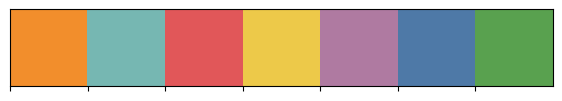

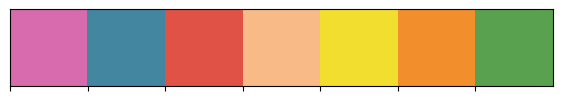

Dirk Gently


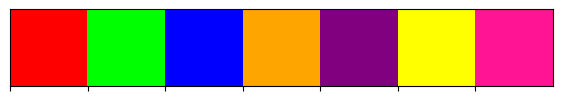

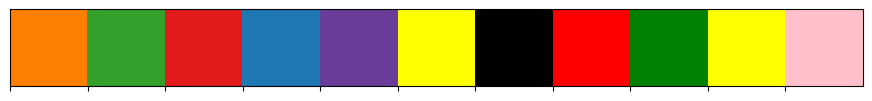

In [16]:
format_color_mapping = {
    'FPC (16384)' :  '#f28e2c',
    'Dictionary'  :  '#76b7b2',
    'CSR5'        :  '#e15759',
    'SparseX'     :  '#edc949',
    'MKL(64-bits)':  '#af7aa1',
    'MKL(32-bits)':  '#4e79a7',
    'HMC (16384)' :  '#59a14f'
}
sns.palplot(list(format_color_mapping.values()))
plt.show()


format_color_mapping = {
    'FPC (16384)' :  cp6[0],
    'Dictionary'  :  cp6[1],
    'CSR5'        :  cp6[2],
    'SparseX'     :  cp6[3],
    'MKL(64-bits)':  cp6[4],
    'MKL(32-bits)':  '#f28e2c',
    'HMC (16384)' :  '#59a14f'
}
sns.palplot(list(format_color_mapping.values()))
plt.show()

print('Dirk Gently')
format_color_mapping = {
    'FPC (16384)' :  '#FF0000',
    'Dictionary'  :  '#00FF00', 
    'CSR5'        :  '#0000FF', 
    'SparseX'     :  '#FFA500', 
    'MKL(64-bits)':  '#800080', 
    'MKL(32-bits)':  '#FFFF00', 
    'HMC (16384)' :  '#FF1493'
}
sns.palplot(list(format_color_mapping.values()))
plt.show()

format_color_mapping = {
    'FPC (16384)' :  '#ff7f00',
    'Dictionary'  :  '#33a02c',
    'CSR5'        :  '#e31a1c',
    'SparseX'     :  '#1f78b4',
    'MKL(64-bits)':  '#6a3d9a',
    'MKL(32-bits)':  'yellow', # '#a6cee3',
    'HMC (16384)' :  'black',  # '#b2df8a'
    'HMC (16384) (tolerance 3)' :  'red',  # '#b2df8a'
    'HMC (16384) (tolerance 6)' :  'green',  # '#b2df8a'
    'HMC (16384) (tolerance 9)' :  'yellow',  # '#b2df8a'
    'HMC (16384) (tolerance 12)' :  'pink',  # '#b2df8a'
}
sns.palplot(list(format_color_mapping.values()))
plt.show()

---

In [17]:
def calc_average(df):
    # Calculate the average gflops for each format_name
    average_gflops = df.groupby('format_name')['gflops'].mean()

    # Create a new DataFrame for the average values
    average_df = pd.DataFrame({'matrix': ['Average'] * len(average_gflops),
                               'format_name': average_gflops.index,
                               'gflops': average_gflops.values,
                               'csr_mem_footprint': [10000] * len(average_gflops)})

    # Append the average information to the original DataFrame
    new_df = pd.concat([df, average_df], ignore_index=True)
    # new_df = new_df[new_df['matrix']=='Average'][['gflops','format_name']]
    # new_df[new_df['format_name'].isin(formats_to_plot)]
    return new_df

lumi_df_ext_avg = calc_average(lumi_df)
icy_df_ext_avg  = calc_average(icy_df)


In [18]:
# print the average performance of each device, by ascending 
formats_to_plot = ['FPC (16384)', 'Dictionary', 'CSR5', 'SparseX', 'MKL(64-bits)', 'MKL(32-bits)', 'HMC (16384)']
print('lumi average format performance')
lumi_df_ext_avg[
  (lumi_df_ext_avg['format_name'].isin(formats_to_plot)) & 
  (lumi_df_ext_avg['matrix']=='Average')]\
[['format_name','gflops']].sort_values(by='gflops',ascending=True)

lumi average format performance


,format_name,gflops
3547,FPC (16384),14.099511
3542,Dictionary,28.164823
3541,CSR5,29.355174
3658,MKL(64-bits),30.774565
3659,SparseX,36.641849
3582,HMC (16384),56.761996
3657,MKL(32-bits),57.373708


In [19]:
formats_to_plot = ['Dictionary', 'CSR5', 'SparseX', 'MKL(64-bits)', 'MKL(32-bits)', 'HMC (16384)']
print('icy average format performance')
icy_df_ext_avg[
  (icy_df_ext_avg['format_name'].isin(formats_to_plot)) &
  (icy_df_ext_avg['matrix']=='Average')]\
[['format_name','gflops']].sort_values(by='gflops',ascending=True)


icy average format performance


,format_name,gflops
1363,Dictionary,7.404106
1362,CSR5,10.374141
1404,MKL(64-bits),10.753559
1405,SparseX,12.230286
1388,HMC (16384),14.183824
1403,MKL(32-bits),17.664558


In [20]:
plt.rc('figure', figsize=(2*width,0.7*height))

# Set the order that formats will be plotted
formats_to_plot = ['FPC (16384)', 'Dictionary', 'CSR5', 'SparseX', 'MKL(64-bits)', 'MKL(32-bits)', 'HMC (16384)']
plot_barplot_device(lumi_df_ext_avg, 'lumi', formats_to_plot)
# plot_barplot_device(lumi_df, 'lumi', formats_to_plot)

formats_to_plot = ['Dictionary', 'CSR5', 'SparseX', 'MKL(64-bits)', 'MKL(32-bits)', 'HMC (16384)']
plot_barplot_device(icy_df_ext_avg,  'icy', formats_to_plot)
# plot_barplot_device(icy_df,  'icy', formats_to_plot)

PDFCROP 1.40, 2020/06/06 - Copyright (c) 2002-2020 by Heiko Oberdiek, Oberdiek Package Support Group.
==> 1 page written on `./plots/performance_comparison_lumi-crop.pdf'.
PDFCROP 1.40, 2020/06/06 - Copyright (c) 2002-2020 by Heiko Oberdiek, Oberdiek Package Support Group.
==> 1 page written on `./plots/performance_comparison_icy-crop.pdf'.


---
# time for error checking (both matrix error and spmv error)
### we have collected measurements for different cutoff point for 3, 6, 9, 12 bits on lumi

In [21]:
# Function to extract the exponent from a scientific notation string
def extract_exponent(sci_notation):
    # Split the string at 'e' to get the exponent part
    parts = str(sci_notation).split('e')
    if len(parts) == 2:
        return int(parts[1])
    else:
        return 0


def error_parsing(sparse_format):
    # if not lossy format tested (mkl-32) no need to use extra in filename of awk
    # else use the specific awk file, that filters only '16384' packet size values
    extra=''
    if('e-' in sparse_format):
        extra = '_16384'

    # thanks dgal for the awk magic!!
    output = subprocess.check_output(['awk', '-f', 'parse_cv_errors'+extra+'.awk', sparse_format + '.out'])
    output_lines = output.decode('utf-8').split('\n')

    # Remove the last empty line if exists
    if output_lines[-1] == '':
        output_lines.pop()

    # Convert the output to a DataFrame    
    # awk returns errors separated by \t, need to parse it and pass it to a pandas dataframe
    header_names = ['Matrix MAE','Matrix max AE','Matrix MSE','Matrix MAPE','Matrix SMAPE',
                    'SpMV MAE',  'SpMV max AE',  'SpMV MSE',  'SpMV MAPE',  'SpMV SMAPE']
    error_df = pd.DataFrame([line.split('\t') for line in output_lines], columns=header_names)
    error_df[header_names] = error_df[header_names].astype(float)
    for variable in header_names:
        error_df[variable + ' exponent'] = error_df[variable].apply(extract_exponent)
    matrix_error_tolerance = sparse_format.split('1e-')
    if(len(matrix_error_tolerance) > 1):
        error_df['Matrix Error Tolerance'] = matrix_error_tolerance[1]
    else:
        error_df['Matrix Error Tolerance'] = 'MKL(float)'
    return error_df

sparse_formats = ['./lumi/sort_diff_lossy/csr_cv_stream_1e-3', './lumi/sort_diff_lossy/csr_cv_stream_1e-6', 
                  './lumi/sort_diff_lossy/csr_cv_stream_1e-9', './lumi/sort_diff_lossy/csr_cv_stream_1e-12',
                  './lumi/mkl_ie_f'
                 ]
all_dfs = []
for sparse_format in sparse_formats:
    all_dfs.append(error_parsing(sparse_format))

matrix_and_spmv_error = pd.concat(all_dfs)
matrix_and_spmv_error

,Matrix MAE,Matrix max AE,Matrix MSE,Matrix MAPE,Matrix SMAPE,SpMV MAE,SpMV max AE,SpMV MSE,SpMV MAPE,SpMV SMAPE,...,Matrix max AE exponent,Matrix MSE exponent,Matrix MAPE exponent,Matrix SMAPE exponent,SpMV MAE exponent,SpMV max AE exponent,SpMV MSE exponent,SpMV MAPE exponent,SpMV SMAPE exponent,Matrix Error Tolerance
0,6.596490e-09,1.943370e-07,3.286890e-16,9.268760e-03,4.635670e-03,2.984880e-05,6.247580e-05,1.040550e-09,4.903530e-03,0.002452,...,-7,-16,0,0,-5,-5,-9,0,0,3
1,3.324130e+01,4.258890e+04,5.392840e+04,3.384880e-02,1.692450e-02,1.624100e+03,1.279860e+05,1.952640e+07,1.499590e+02,10.192600,...,0,0,0,0,0,0,0,0,0,3
2,1.136250e-04,4.924830e-02,3.022680e-07,4.275900e-02,2.137940e-02,4.764950e-03,1.162830e-01,8.790880e-05,2.175870e+00,0.520883,...,0,-7,0,0,0,0,-5,0,0,3
3,1.053630e+13,1.983280e+17,3.670430e+29,2.581680e-02,1.293980e-02,3.821150e+14,3.319300e+17,3.445440e+31,inf,63.212000,...,17,29,0,0,0,17,31,0,0,3
4,3.172760e-01,5.715570e+02,3.283290e+01,2.434080e-02,1.217040e-02,1.108150e+01,8.649890e+02,3.212820e+03,2.857690e+08,27.085600,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,2.150000e-09,4.700000e-07,3.550000e-16,3.700000e-08,1.850000e-08,1.039800e-06,8.583070e-06,3.169260e-12,1.697140e-05,0.000008,...,-7,-16,-8,-8,-6,-6,-12,-5,-6,MKL(float)
25,9.410000e-08,1.910000e-03,6.530000e-12,1.860000e-06,9.290000e-07,1.356450e-05,1.228170e-02,6.507190e-09,2.027590e-02,0.008418,...,0,-12,-6,-7,-5,0,-9,0,0,MKL(float)
26,2.290000e+04,2.140000e+09,1.950000e+12,2.060000e-06,1.030000e-06,9.224060e+05,5.368710e+09,4.490640e+14,inf,63.150200,...,0,0,-6,-6,0,0,0,0,0,MKL(float)
27,2.220000e-09,2.980000e-08,1.850000e-17,2.110000e-06,1.050000e-06,4.171630e-08,3.040700e-06,5.534410e-15,inf,23.444300,...,-8,-17,-6,-6,-8,-6,-15,0,0,MKL(float)


In [22]:
def plot_error(error_df, variable, plot_type='box'):
    # Get unique values of 'Matrix Error Tolerance' and reverse the order
    unique_error_tolerances = error_df['Matrix Error Tolerance'].unique()[::-1]
    
    if(plot_type == 'violin'):
        ax = sns.violinplot(x='Matrix Error Tolerance', y=variable, data=error_df,
                           fliersize = .3, linewidth=1, width=.6, dodge=True, order=unique_error_tolerances)
    elif(plot_type == 'box'):
        ax = sns.boxplot(x='Matrix Error Tolerance', y=variable, data=error_df,
                           fliersize = .3, linewidth=1, width=.6, dodge=True, order=unique_error_tolerances)
    
    plt.xlabel('Matrix Error Tolerance')
    plt.ylabel(variable)
    if('exponent' not in variable):
        plt.yscale('log')  # Set y-axis scale to log (only when printing boxplot)
    ax.xaxis.set_label_coords(0.6, -0.15)  # Adjust the y-coordinate as needed
    
    # Save the plot as a PDF
    plt.tight_layout()
    plt.savefig('./plots/'+variable.replace(' ','_') + '_' + plot_type + '.pdf')
    plt.close()
    subprocess.run(['pdfcrop', './plots/'+variable.replace(' ','_') + '_' + plot_type + '.pdf'])
    subprocess.run(['mv', './plots/'+variable.replace(' ','_') + '_' + plot_type + '-crop.pdf', 
                          './plots/'+variable.replace(' ','_') + '_' + plot_type + '.pdf'])

plt.rc('figure', figsize=(width,height))

# header_names = ['Matrix MAE','Matrix max AE','Matrix MSE','Matrix MAPE','Matrix SMAPE',
#                 'SpMV MAE',  'SpMV max AE',  'SpMV MSE',  'SpMV MAPE',  'SpMV SMAPE']
header_names = ['Matrix SMAPE', 'SpMV SMAPE']
for variable in header_names:
    # plot_error(matrix_and_spmv_error, variable, plot_type = 'box')
    plot_error(matrix_and_spmv_error, variable + ' exponent', plot_type = 'violin')

PDFCROP 1.40, 2020/06/06 - Copyright (c) 2002-2020 by Heiko Oberdiek, Oberdiek Package Support Group.
==> 1 page written on `./plots/Matrix_SMAPE_box-crop.pdf'.
PDFCROP 1.40, 2020/06/06 - Copyright (c) 2002-2020 by Heiko Oberdiek, Oberdiek Package Support Group.
==> 1 page written on `./plots/Matrix_SMAPE_exponent_violin-crop.pdf'.
PDFCROP 1.40, 2020/06/06 - Copyright (c) 2002-2020 by Heiko Oberdiek, Oberdiek Package Support Group.
==> 1 page written on `./plots/SpMV_SMAPE_box-crop.pdf'.
PDFCROP 1.40, 2020/06/06 - Copyright (c) 2002-2020 by Heiko Oberdiek, Oberdiek Package Support Group.
==> 1 page written on `./plots/SpMV_SMAPE_exponent_violin-crop.pdf'.


In [23]:
plt.rc('figure', figsize=(2*width,0.7*height))

# Set the order that formats will be plotted
formats_to_plot = ['MKL(64-bits)', 'MKL(32-bits)', 'HMC (16384)', 
                   'HMC (16384) (tolerance 12)', 'HMC (16384) (tolerance 9)',
                   'HMC (16384) (tolerance 6)', 'HMC (16384) (tolerance 3)']
plot_barplot_device(lumi_df_ext_avg, 'lumi', formats_to_plot, '_error-tolerance')
# plot_barplot_device(lumi_df, 'lumi', formats_to_plot)

PDFCROP 1.40, 2020/06/06 - Copyright (c) 2002-2020 by Heiko Oberdiek, Oberdiek Package Support Group.
==> 1 page written on `./plots/performance_comparison_lumi_error-tolerance-crop.pdf'.


---
# panastas magic

In [24]:
# For Petros magic in paper
filter_df = lumi_df[lumi_df['format_name'] == 'HMC (16384)'][['matrix','mem_footprint', 'csr_mem_footprint', 'compression_ratio']]
filter_df.sort_values(by='csr_mem_footprint', ascending=True, inplace=True)
filter_df.to_csv('./plots/compression_16384.csv', index=False)
filter_df

,matrix,mem_footprint,csr_mem_footprint,compression_ratio
240,spal_004,240.874468,528.391174,0.455864
259,ldoor,420.324750,536.039845,0.784130
278,dielFilterV2real,491.771460,559.899570,0.878321
316,af_shell10,414.252256,608.539738,0.680732
297,nv2,428.153537,608.974438,0.703073
335,boneS10,212.984193,638.275776,0.333687
354,circuit5M,314.330976,702.404785,0.447507
373,Hook_1498,431.186882,702.859341,0.613475
392,Geo_1438,462.534705,728.256344,0.635126
411,Serena,491.143406,743.814289,0.660304


In [25]:
matrices_str = "bone010\tboneS10\tcage15\tnlpkkt120\tnlpkkt160\tnlpkkt200\tcircuit5M\tFlan_1565\tvas_stokes_2M\tspal_004\tvas_stokes_4M\tstokes\taf_shell10\tHook_1498\tnv2\tCube_Coup_dt0\tCube_Coup_dt6\tldoor\tdielFilterV2real\tGeo_1438\tSerena\tLong_Coup_dt0\tLong_Coup_dt6\taudikw_1\tdielFilterV3real\tBump_2911\tML_Geer\tQueen_4147\tHV15R"
matrix_names = matrices_str.replace('_','\_').split("\t")
#matrix_names
matrices_sz_str = "823.919979\t638.275776\t1154.912998\t1121.825321\t2658.462284\t5191.485966\t702.404785\t1349.574764\t753.531605\t528.391174\t1522.503262\t4041.349312\t608.539738\t702.859341\t608.974438\t1464.016697\t1464.016697\t536.039845\t559.89957\t728.256344\t743.814289\t1002.262608\t1002.262608\t892.25478\t1026.233234\t1472.858875\t1274.657894\t3786.640026\t3247.213531"
matrixes_sz = list(map(lambda x: np.double(x), matrices_sz_str.split("\t")))
#matrixes_sz
matrices_uv_str = "5.30E-07\t7.21E-07\t5.44E-06\t2.07E-05\t1.62E-05\t1.24E-05\t0.000718295\t0.00647238\t0.0226447\t0.0612745\t0.0377353\t0.0310682\t0.206748\t0.193697\t0.256889\t0.148341\t0.148405\t0.465906\t0.511923\t0.464047\t0.507285\t0.413868\t0.413869\t0.476789\t0.505379\t0.507364\t0.989451\t0.477945\t0.835282"
matrices_uv = list(map(lambda x: np.double(x), matrices_uv_str.split("\t")))
#matrices_uv

merge_df = pd.DataFrame(
    {'Name': matrix_names,
     'Size': matrixes_sz,
     'UV': matrices_uv
    }).sort_values('Size')

matrices_szc_str = "240.874468,420.32475,491.77146,414.252256,428.153537,212.984193,314.330976,431.186882,462.534705,491.143406,415.798345,274.985479,651.625595,612.395664,613.908869,910.79281,464.078259,480.486862,893.000404,529.35609,685.467156,691.248268,863.741854,869.577411,1099.317433,2833.181491,2408.419473,2428.59264,2146.266891"
matrices_szc = list(map(lambda x: np.double(x), matrices_szc_str.split(","))) 
merge_df['Size_comp'] = matrices_szc
merge_df['Size_perc'] = merge_df['Size_comp']/ merge_df['Size']
id = 1
for idx,elem in merge_df.iterrows():
    if (100*elem[2] < 0.1):
        print("%d & %s & %.2e & %.2lf \\\\" %(id, elem[0], 100*elem[2], 100*elem[4]))
    else:
        print("%d & %s & %.2lf & %.2lf \\\\" %(id, elem[0], 100*elem[2], 100*elem[4]))
    id+=1

1 & spal\_004 & 6.13 & 45.59 \\
2 & ldoor & 46.59 & 78.41 \\
3 & dielFilterV2real & 51.19 & 87.83 \\
4 & af\_shell10 & 20.67 & 68.07 \\
5 & nv2 & 25.69 & 70.31 \\
6 & boneS10 & 7.21e-05 & 33.37 \\
7 & circuit5M & 7.18e-02 & 44.75 \\
8 & Hook\_1498 & 19.37 & 61.35 \\
9 & Geo\_1438 & 46.40 & 63.51 \\
10 & Serena & 50.73 & 66.03 \\
11 & vas\_stokes\_2M & 2.26 & 55.18 \\
12 & bone010 & 5.30e-05 & 33.38 \\
13 & audikw\_1 & 47.68 & 73.03 \\
14 & Long\_Coup\_dt0 & 41.39 & 61.10 \\
15 & Long\_Coup\_dt6 & 41.39 & 61.25 \\
16 & dielFilterV3real & 50.54 & 88.75 \\
17 & nlpkkt120 & 2.07e-03 & 41.37 \\
18 & cage15 & 5.44e-04 & 41.60 \\
19 & ML\_Geer & 98.95 & 70.06 \\
20 & Flan\_1565 & 0.65 & 39.22 \\
21 & Cube\_Coup\_dt0 & 14.83 & 46.82 \\
22 & Cube\_Coup\_dt6 & 14.84 & 47.22 \\
23 & Bump\_2911 & 50.74 & 58.64 \\
24 & vas\_stokes\_4M & 3.77 & 57.11 \\
25 & nlpkkt160 & 1.62e-03 & 41.35 \\
26 & HV15R & 83.53 & 87.25 \\
27 & Queen\_4147 & 47.79 & 63.60 \\
28 & stokes & 3.11 & 60.09 \\
29 & nlpkkt200 